In [2]:
#Importing required libraries
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
c:\users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [3]:
#Read csv file and creating a dataframe
given_dataset = pd.read_csv("A_Z_Handwritten_Data.csv").astype("float32")

In [4]:
#First five rows of dataset
given_dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Last five rows of dataset
given_dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Information about the dataset
given_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [7]:
#renaming 0th column of data set as label
given_dataset.rename(columns={'0': "label"}, inplace=True)

In [8]:
#x and y represents data and label
x = given_dataset.drop("label", axis=1)
y = given_dataset["label"]

In [9]:
x = x.values

In [10]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: label, Length: 372450, dtype: float32

In [12]:
print(x.shape,y.shape)

(372450, 784) (372450,)


In [13]:
#Reshaping images to get the images context
data = []
#Looping through 784 pixels in the dataset x
for flatten in x:
  img = np.reshape(flatten, (28, 28, 1))  #rehsaping pixels 
  data.append(img)

alphabets_data = np.array(data, dtype=np.float32)
alphabets_target = y

In [15]:
#Shape of data and the label
print(alphabets_data.shape, alphabets_target.shape)

(372450, 28, 28, 1) (372450,)


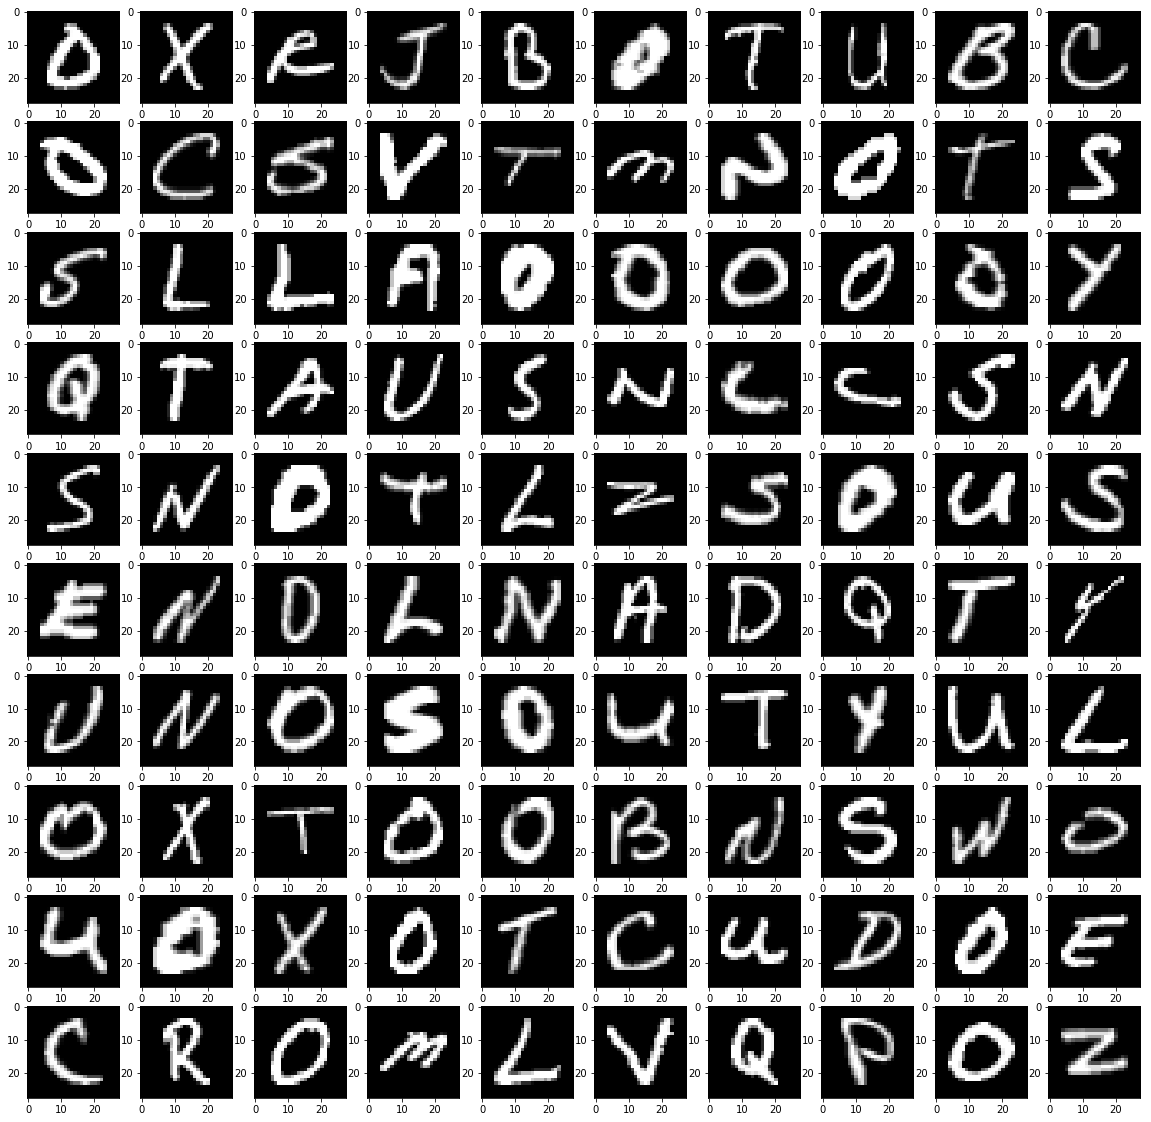

In [16]:
#Visualizing radom 100 images of alphabets using matplotlib
shuffled_data = shuffle(alphabets_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [17]:
#splitting the data to train and test in 80-20
train_data, test_data, train_labels, test_labels = train_test_split(alphabets_data, alphabets_target, test_size=0.2)

In [18]:
#Shape of train test data and lables
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(297960, 28, 28, 1) (297960,)
(74490, 28, 28, 1) (74490,)


In [19]:
#Normalizing each pixels of train and test data
train_data = train_data / 255.0
test_data = test_data / 255.0

#Converting train and test label to categorical form
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

#converting train and test data to 4d array
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

In [20]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(297960, 28, 28, 1) (297960, 26)
(74490, 28, 28, 1) (74490, 26)


In [21]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

In [22]:
alphabets_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

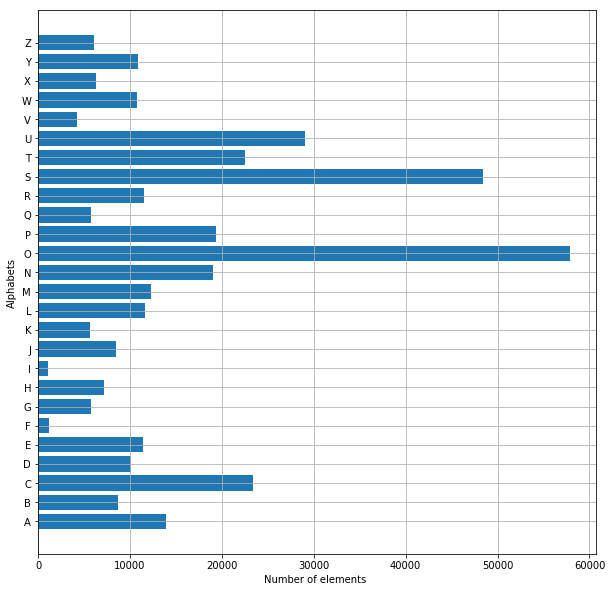

In [23]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') #a vector of size 26 with all 0 values
for i in y_int:
    count[i] +=1 #total count of each alphabet

alphabets = []
for i in alphabets_dict.values():
    alphabets.append(i) #all alphabets

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [48]:
counts = [train_label_counts, test_label_counts] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

plt.xticks(range(len(counts[0])), alphabets_dict)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(counts[0])), counts[0], color="b", width=0.35)
ax.bar(np.arange(len(counts[1])) + 0.35, counts[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [25]:
np.save("train_data", train_data)
np.save("train_labels", train_labels)
np.save("test_data", test_data)
np.save("test_labels", test_labels)

In [26]:
#importing libraries
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
#loading train test data and labels
train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

In [34]:
#creating CNN model
model = Sequential()

#Feature extraction layer
#First layer convolutional with 32 convolution of size 5*5
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

#Second layer convolution with 32 convolution of size 5*5
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

#third layer flatten
model.add(BatchNormalization())
model.add(Flatten())

#classification layer
model.add(Dense(256, activation="relu"))
model.add(Dense(26, activation="softmax"))  #26 as no of neurons in outputlayer should be equal to number of labels


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_11 (Batc (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 10, 32)       

In [44]:
#Trainig the model
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=2,  #for each  and every step of epoch ,2000 random images will fit to a model
    batch_size=2000  
)

Train on 297960 samples, validate on 74490 samples
Epoch 1/2
297960/297960 [==============================] - 1376s 5ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.0244 - val_accuracy: 0.9942
Epoch 2/2
297960/297960 [==============================] - 1380s 5ms/step - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.0218 - val_accuracy: 0.9948


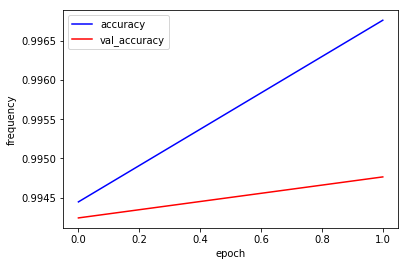

In [47]:
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [51]:
#accuracy on test data
acc = model.evaluate(test_data, test_labels)
print(acc)

74490/74490 [==============================] - 65s 877us/step
[0.02182451277924742, 0.9947643876075745]


In [52]:
predictions = model.predict(test_data)

In [59]:
predictions

array([[2.20854626e-17, 1.90528288e-15, 1.58574044e-16, ...,
        4.26168282e-17, 5.83381915e-15, 1.69016092e-12],
       [1.12931218e-15, 9.73506924e-21, 1.72318782e-19, ...,
        1.00000000e+00, 4.66382377e-10, 7.47456296e-14],
       [8.59088495e-11, 1.44839774e-09, 8.08624137e-08, ...,
        3.56873363e-12, 1.03764899e-10, 7.59704548e-08],
       ...,
       [1.31037447e-13, 1.02114912e-14, 4.37343217e-12, ...,
        2.72538827e-13, 5.98489452e-11, 1.09096540e-16],
       [2.34168320e-16, 2.17546241e-11, 9.99998450e-01, ...,
        2.75999968e-15, 1.36486395e-11, 5.31098054e-09],
       [9.99777496e-01, 2.07822239e-07, 7.33639283e-09, ...,
        3.34426398e-09, 2.73022438e-11, 1.40556693e-07]], dtype=float32)

In [60]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[ 2716     0     0     0     0     0     0     2     0     0     1     1
      0     0     0     0     1     0     1     1     0     0     0     0
      0     0]
 [    0  1713     0     2     1     0     1     0     0     0     0     0
      0     0     1     0     1     5     3     0     0     0     0     0
      0     1]
 [    0     2  4536     0     1     0     0     0     0     0     0    13
      0     1     4     0     0     0     0     1     3     0     0     0
      0     1]
 [    0     3     0  1965     0     0     0     0     0     1     0     0
      0     0    36     3     0     0     1     1     0     0     0     0
      0     0]
 [    0     0     3     0  2309     3     2     0     0     0     0     0
      0     0     0     0     0     1     0     0     0     0     0     0
      0     3]
 [    0     0     0     0     0   237     1     0     0     0     0     0
      0     1     0     0     0     0     0     2     0     0     0     0
      0     0]
 [    0     2     6   

In [61]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
          'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")